In [2]:
#Importamos bibliotecas:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import  numpy as np
from PIL import Image

#Para que sea mostrado en Jupyter:-activar en tal caso-
%matplotlib inline

In [3]:
#Importamos imagenes:
bienv=Image.open("imagen.jpg")
imag=np.array(bienv)

In [4]:
#Tipo de dato:
print(type(imag))
#Dimensión:
print(imag.ndim)
print(imag.shape)

<class 'numpy.ndarray'>
3
(1080, 1440, 3)


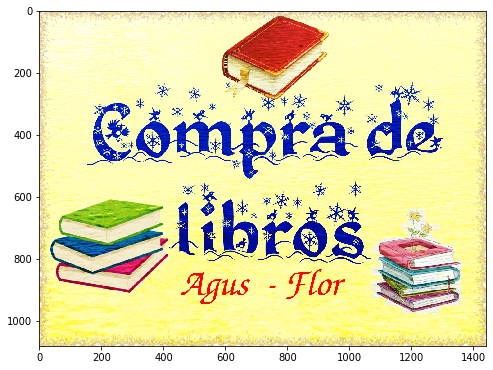

In [7]:

#Ver imagen:
plt.figure(figsize=(8,8))
plt.imshow(imag)

In [8]:
#Abrimos el archivo:
libreria=open("libros.csv").readlines()
#Armamos diccionario:
header=libreria[0]
libros={}

In [9]:
#Obtenemos los nombres de las columnas como claves del diccionario
for columna in header.split(";"):
	columna=columna.strip().lower()
	libros[columna]=[]

In [10]:
#Convertimos todo a Nunpy (operador de vectores y matrices):
for elemento in libros:
	libros[elemento]=np.array(libros[elemento])

In [11]:
#Convertir a int los datos que sean necesarios:
precios= list (libros.keys())[3: ]
for elemento in precios:
	libros[elemento]=libros[elemento.astype(np.int)]
#A string:
"""autor= list (libros.keys())[1: ]
for elemento in autor:
	libros[elemento]=libros[elemento.astype(np.string)]
"""

AttributeError: 'str' object has no attribute 'astype'

In [12]:
#Gráficamos:
#plt.bar(libros["Autor"],libros["Precios"])
#plt.xticks(rotation=90)
#plt.title("Ventas")

In [13]:
#Ahora trabajamos dataframe:
libro2=pd.read_csv("libros.csv",sep=";")

#Separado por “;” lo muestra con:
libro2.head()

#Verificamos nombres de columnas:
libro2.columns

Index(['Autor', 'Titulo', 'Nacionalidad', 'Precio'], dtype='object')

In [14]:
#Le damos un índice de selección:
libro2.iloc[:,[0,3,1]]

#1. Separamos por países:
paises=libro2.groupby("Nacionalidad")

#Vemos la separación:
paises.groups

{'Argentina': Int64Index([1, 3, 4, 12, 13, 18], dtype='int64'),
 'España': Int64Index([10], dtype='int64'),
 'Estados Unidos': Int64Index([7, 9, 15, 16], dtype='int64'),
 'Inglaterra': Int64Index([0, 14, 17], dtype='int64'),
 'Irlanda': Int64Index([11], dtype='int64'),
 'Italia': Int64Index([19], dtype='int64'),
 'Japón': Int64Index([8], dtype='int64'),
 'Reino Unido': Int64Index([2, 6], dtype='int64'),
 'Rusia': Int64Index([5], dtype='int64')}

In [15]:
#Ver lista separada/iterable:
for pais, libro in paises:
	print("======================")
	print(pais)
	print("======================")
	print(libro)
	print()

Argentina
                  Autor                        Titulo Nacionalidad  Precio
1           Luis Borges                      El Aleph    Argentina   53000
3        Ernesto Sabato                      El Túnel    Argentina   34000
4        Ernesto Sabato         Sobre héroes y tumbas    Argentina    6500
12         Elisa Roldán                   Decir amigo    Argentina    3200
13    Antonio Santa Ana  Los ojos del perro siberiano    Argentina    4580
18  Adolfo Bioy Caseres         La invención de Morel    Argentina    2130

España
                 Autor               Titulo Nacionalidad  Precio
10  Ildefonso Falcones  La catedral del mar       España   12000

Estados Unidos
                Autor               Titulo    Nacionalidad  Precio
7     Edgar Allan Poe            The Raven  Estados Unidos   20000
9       Stephen King             The Stand  Estados Unidos  150000
15    Agatha Christie    Muerte en el Nilo  Estados Unidos   40000
16  Elizabeth Gilbert  Comer, rezar y amar 

In [16]:
#Seleccionamos una columna para trabajar:
paises.max()

#2. Separamos por escritor:
escritor=libro2.groupby("Autor")

#Vemos la separación:
escritor.groups

{'Adolfo Bioy Caseres': Int64Index([18], dtype='int64'),
 'Agatha Christie': Int64Index([15], dtype='int64'),
 'Alan Turing\xa0': Int64Index([17], dtype='int64'),
 'Antonio Santa Ana': Int64Index([13], dtype='int64'),
 'Edgar Allan Poe': Int64Index([7], dtype='int64'),
 'Elisa Roldán': Int64Index([12], dtype='int64'),
 'Elizabeth Gilbert': Int64Index([16], dtype='int64'),
 'Ernesto Sabato': Int64Index([3, 4], dtype='int64'),
 'H.P Lovecraft': Int64Index([0], dtype='int64'),
 'Haruki Murakami': Int64Index([8], dtype='int64'),
 'Ildefonso Falcones': Int64Index([10], dtype='int64'),
 'Isaac Asimov': Int64Index([5], dtype='int64'),
 'J.K Rowling': Int64Index([6], dtype='int64'),
 'Luis Borges': Int64Index([1], dtype='int64'),
 'Neil Gaiman': Int64Index([14], dtype='int64'),
 'Nicolás Maquiavelo': Int64Index([19], dtype='int64'),
 'Oscar Wilde': Int64Index([11], dtype='int64'),
 'Stephen Hawking': Int64Index([2], dtype='int64'),
 'Stephen King\xa0': Int64Index([9], dtype='int64')}

In [17]:
#Ver lista separada/iterable:
for autor, libro in escritor:
 	print("======================")
	print(autor)
	print("======================")
	print(libro)
	print()

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-17-5bbbb7d3f04a>, line 4)

In [18]:
#Seleccionamos una columna para trabajar:
escritor.max()

type(libro2)
libro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
Autor           20 non-null object
Titulo          20 non-null object
Nacionalidad    20 non-null object
Precio          20 non-null int64
dtypes: int64(1), object(3)
memory usage: 768.0+ bytes


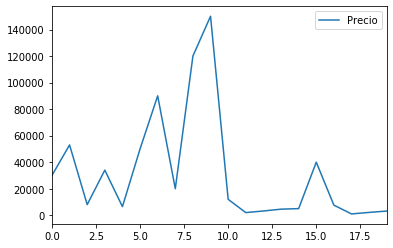

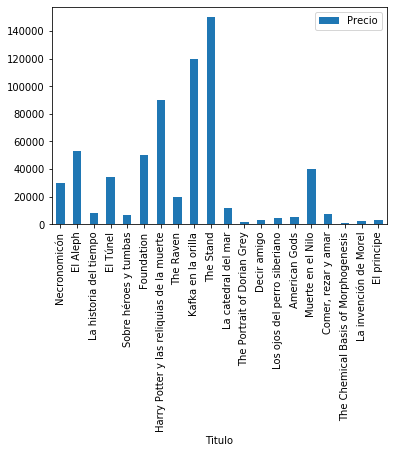

In [21]:
%matplotlib inline

libro2.plot()
libro2.plot(kind="bar", x="Titulo")

In [19]:
# -------------------------------------------------------------------------------------
# Agregar columna de compras (randomizada)
import random
lista_compras = [1]

In [20]:
"Función:
def listaAleatorios(n):
	lista = [0]  * n
	for i in range(n):
		lista[i] = random.randint(0, 1000)
return lista

SyntaxError: EOL while scanning string literal (<ipython-input-20-40ba7610e9bc>, line 1)

In [21]:
lista_compras=listaAleatorios(20)
print(lista_compras)

NameError: name 'listaAleatorios' is not defined

In [22]:
# Añadirla al df
import pandas as pd
libro2 = pd.DataFrame(lista_compras)
libro2['Cantidades compradas'] = lista_compras

In [23]:
#Fechas dataframe:
fechas=pd.read_csv("Fechas.csv",sep=";")

fechas.head()

,Fechas
0,2019-12-20
1,2019-03-09
2,2019-01-30
3,2019-06-27
4,2019-04-17


In [24]:
#Función:
def listaAleatorios(n):
	lista = [0]  *n
	for i in range(n):
		lista[i] = random.randint(1, 12)
	return lista
fechas=listaAleatorios(20)
print(fechas)

[8, 2, 1, 9, 7, 2, 2, 1, 4, 5, 5, 3, 1, 4, 11, 4, 3, 5, 8, 8]


In [25]:
libro2 = pd.DataFrame(libro2)
libro2['fechas'] = fechas
libro2.head()

ValueError: Length of values does not match length of index

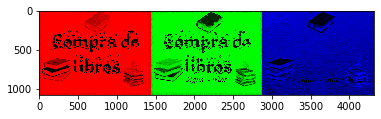

In [26]:
#Imagen despedida:
im_R= imag.copy()
im_R[:, :, (1, 2)]=0
im_G=imag.copy()
im_G[:,:,(0,2)]=0
im_B=imag.copy()
im_B[:, :, (0,1)]=0

im_RGB=np.concatenate((im_R, im_G, im_B),axis=1)

plt.imshow(im_RGB);

# ELECCIÓN DEL USER

In [28]:
# Entrada (parte 1)
opcion = input("Qué desea leer? (inserte género)")

# Salida: recomendaciones en función de género
if opcion == "ciencia ficción":
    print("Te recomendamos Harry Potter: Las Reliquias de la Muerte de J.K Rowling o Foundation de Isaac Asimov")

if opcion == "terror":
    print("Te recomendamos Necronomicón de H.P Lovecraft o The Stand de Stephen King")

if opcion == "drama":
    print("Te recomendamos Comer, Rezar y Amar de Elizabeth Gilbert")

if opcion == "policial":
    print("Te recomendamos Muerte en el Nilo de Agatha Christie o El Túnel de Ernesto Sabato")

if opcion == "drama":
    print("Te recomendamos The Portrait of Dorian Gray de Oscar Wilde o Los Ojos del Perro Siberiano de Antonio Santana")

if opcion == "ciencia":
    print("Te recomendamos The Chemical Basis of Morphogenesis de Alan Turing o La Historia del Tiempo de Stephen Hawking")

Qué desea leer? (inserte género)terror
Te recomendamos Necronomicón de H.P Lovecraft o The Stand de Stephen King


In [30]:
# Librerías (parte 2)
libreria=open("libros.csv").readlines()
import random
import numpy as num
header=libreria[0]
libros={}


In [31]:

#Obtenemos los nombres de las columnas como claves del diccionario
for columna in header.split(";"):
	columna=columna.strip().lower()
	libros[columna]=[]


In [32]:

#Convertimos todo a Nunpy (operador de vectores y matrices):
for elemento in libros:
	libros[elemento]=np.array(libros[elemento])


In [33]:
# Convertir a string la columna
titulos= list (libros.keys())[2: ]
for elemento in titulos:
	librosC=libros[elemento.astype(np.string)]


AttributeError: 'str' object has no attribute 'astype'

In [34]:

# Hacemos el random
veces = random.randint(1,5)
hoy_leo = titulos[veces]

# Salida: título random
if opcion == upper(si) and lower(si):
    print("Te recomendamos leer", hoy_leo)
else:
    print("Gracias por visitarnos")


IndexError: list index out of range